<h2 align="center"> 🛠️ Regression of Used Car Prices 🔮</h2>

### **Objective** 🎯

The objective of this competition is to predict the price of used cars based on various attributes. The dataset provided for this competition includes various features related to used cars, such as the car's model, year of manufacture, mileage, fuel type, transmission type, and engine power. The target variable for this competition is the price of the used car.

### **Dataset** 📦

| Variable Name  | Definition                                                   |
|----------------|--------------------------------------------------------------|
| id             | Unique identifier for each entry                             |
| brand          | Brand of the vehicle                                          |
| model          | Model of the vehicle                                          |
| model_year     | Year the vehicle model was manufactured                       |
| milage         | Mileage of the vehicle (in miles)                             |
| fuel_type      | Type of fuel the vehicle uses (e.g., Gasoline, Flex Fuel)     |
| engine         | Engine specification including horsepower and type           |
| transmission   | Type of transmission (e.g., A/T, Dual Shift Mode)             |
| ext_col        | Exterior color of the vehicle                                 |
| int_col        | Interior color of the vehicle                                 |
| accident       | Information about any accidents or damages reported           |
| clean_title    | Indicates if the vehicle has a clean title (Yes/No)           |
| price          | Price of the vehicle                                          |


### Library Imports

In [67]:
# Importing the basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')


### Data Pre-Processing 🛠️

In [68]:
train_df = pd.read_csv('./playground-series-s4e9/train.csv',index_col=0)
test_df = pd.read_csv('./playground-series-s4e9/test.csv',index_col=0)
submission_df = pd.read_csv('./playground-series-s4e9/sample_submission.csv',index_col=0)

In [69]:
print('The dimension of the train dataset is:', train_df.shape)
print('The dimension of the test dataset is:', test_df.shape)

The dimension of the train dataset is: (188533, 12)
The dimension of the test dataset is: (125690, 11)


In [70]:
train_df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
id,,,,,,,,,,,,
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [71]:
test_df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
id,,,,,,,,,,,
188533,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
188534,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes
188535,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,NaN
188536,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,NaN
188537,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes


In [72]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188533 entries, 0 to 188532
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   brand         188533 non-null  object
 1   model         188533 non-null  object
 2   model_year    188533 non-null  int64 
 3   milage        188533 non-null  int64 
 4   fuel_type     183450 non-null  object
 5   engine        188533 non-null  object
 6   transmission  188533 non-null  object
 7   ext_col       188533 non-null  object
 8   int_col       188533 non-null  object
 9   accident      186081 non-null  object
 10  clean_title   167114 non-null  object
 11  price         188533 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 18.7+ MB


In [73]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125690 entries, 188533 to 314222
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   brand         125690 non-null  object
 1   model         125690 non-null  object
 2   model_year    125690 non-null  int64 
 3   milage        125690 non-null  int64 
 4   fuel_type     122307 non-null  object
 5   engine        125690 non-null  object
 6   transmission  125690 non-null  object
 7   ext_col       125690 non-null  object
 8   int_col       125690 non-null  object
 9   accident      124058 non-null  object
 10  clean_title   111451 non-null  object
dtypes: int64(2), object(9)
memory usage: 11.5+ MB


In [74]:
train_df.describe(include='all')

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
count,188533,188533,188533.000000,188533.000000,183450,188533,188533,188533,188533,186081,167114,1.885330e+05
unique,57,1897,NaN,NaN,7,1117,52,319,156,2,1,NaN
top,Ford,F-150 XLT,NaN,NaN,Gasoline,355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes,NaN
freq,23088,2945,NaN,NaN,165940,3462,49904,48658,107674,144514,167114,NaN
mean,NaN,NaN,2015.829998,65705.295174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.387802e+04
std,NaN,NaN,5.660967,49798.158076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.881952e+04
min,NaN,NaN,1974.000000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000e+03
25%,NaN,NaN,2013.000000,24115.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.700000e+04
50%,NaN,NaN,2017.000000,57785.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.082500e+04
75%,NaN,NaN,2020.000000,95400.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.990000e+04


In [75]:
test_df.describe(include='all')

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
count,125690,125690,125690.000000,125690.000000,122307,125690,125690,125690,125690,124058,111451
unique,55,1891,NaN,NaN,7,1117,52,317,156,2,1
top,Ford,F-150 XLT,NaN,NaN,Gasoline,355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes
freq,15265,1923,NaN,NaN,110533,2189,33132,32370,71613,96263,111451
mean,NaN,NaN,2015.797526,66042.581510,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,5.673797,50223.858435,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1974.000000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2013.000000,24500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2017.000000,57500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,2020.000000,95798.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
round(100*train_df.isnull().sum()/train_df.shape[0],4)

brand            0.0000
model            0.0000
model_year       0.0000
milage           0.0000
fuel_type        2.6961
engine           0.0000
transmission     0.0000
ext_col          0.0000
int_col          0.0000
accident         1.3006
clean_title     11.3609
price            0.0000
dtype: float64

In [77]:
round(100*test_df.isnull().sum()/test_df.shape[0],4)

brand            0.0000
model            0.0000
model_year       0.0000
milage           0.0000
fuel_type        2.6915
engine           0.0000
transmission     0.0000
ext_col          0.0000
int_col          0.0000
accident         1.2984
clean_title     11.3287
dtype: float64

In [78]:
# Check for duplicated rows in the train DataFrame
num_duplicates_train = sum(train_df.duplicated())
print(f"There are {num_duplicates_train} duplicated rows in the train data frame.")


There are 0 duplicated rows in the train data frame.


In [79]:

# Check for duplicated rows after dropping the 'price' column in the train DataFrame
num_duplicates_train_no_price = sum(train_df.drop(columns=['price']).duplicated())
print(f"After dropping the 'price' column, there are {num_duplicates_train_no_price} duplicated rows in the train data frame.")


After dropping the 'price' column, there are 0 duplicated rows in the train data frame.


In [80]:

# Check for duplicated rows in the test DataFrame
num_duplicates_test = sum(test_df.duplicated())
print(f"There are {num_duplicates_test} duplicated rows in the test data frame.")


There are 0 duplicated rows in the test data frame.


In [81]:
#  Check for observations that appear in both the train and test datasets

temp_train = train_df.drop(columns=['price'], axis=1)
temp_test = test_df


inner_join = pd.merge(temp_train, temp_test)
print(f"There are {inner_join.shape} observations that appear in both the train and test data frames")


There are (0, 11) observations that appear in both the train and test data frames


### Data Exploration 📊

In [82]:
#  Set Seaborn style for better aesthetics
sns.set(style="whitegrid")


In [83]:
# create a function to plot the distribution of the target variable

def plot_target_distribution(data, title):
    
    plt.figure(figsize=(12, 6))
    sns.histplot(data, kde=True, color='blue')
    plt.title(title, fontsize=15)
    plt.xlabel('Price', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.show()

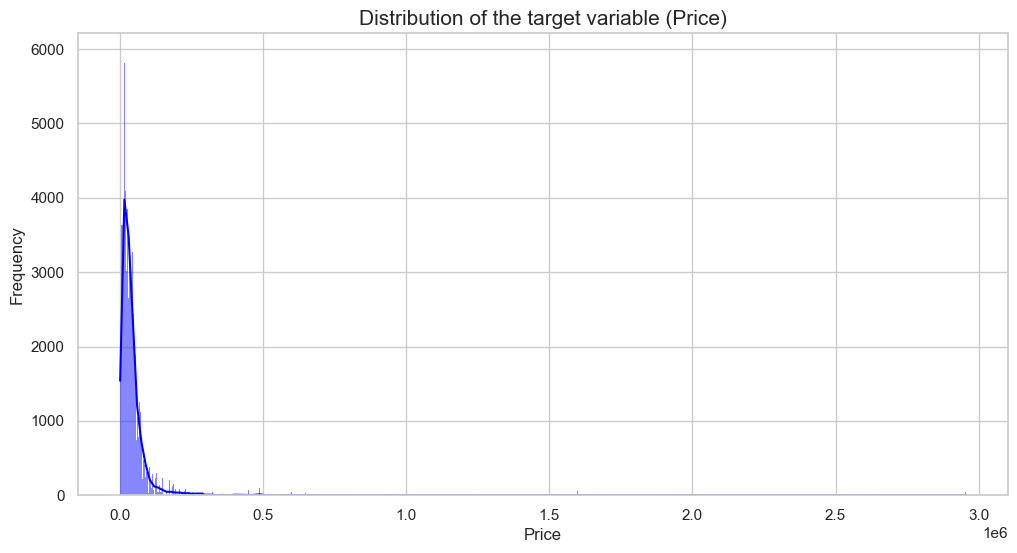

In [84]:
plot_target_distribution(train_df['price'], 'Distribution of the target variable (Price)')

In [85]:

plt.figure(figsize=(14, 8))
avg_price_by_brand = train_df.groupby('brand')['price'].mean().sort_values(ascending=False)
sns.barplot(x=avg_price_by_brand.index, y=avg_price_by_brand.values, palette='muted')
plt.xticks(rotation=90)
plt.title('Average Price by Brand', fontsize=16)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.show()



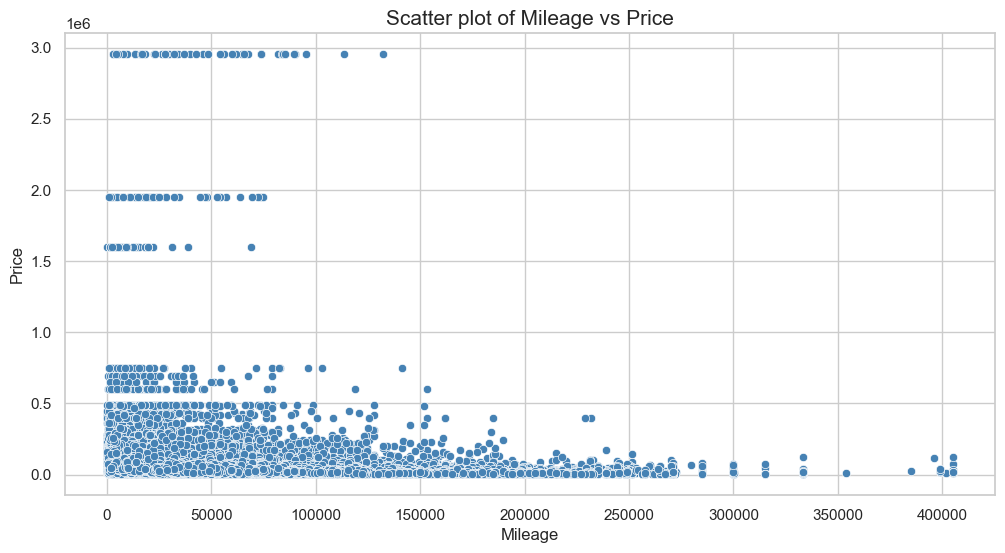

In [ ]:
# plot the relationship between the 'mileage' and 'price' columns
plt.figure(figsize=(12, 6))
sns.scatterplot(data=train_df, x='milage', y='price', color='steelblue')
plt.title('Scatter plot of Mileage vs Price', fontsize=15)
plt.xlabel('Mileage', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()


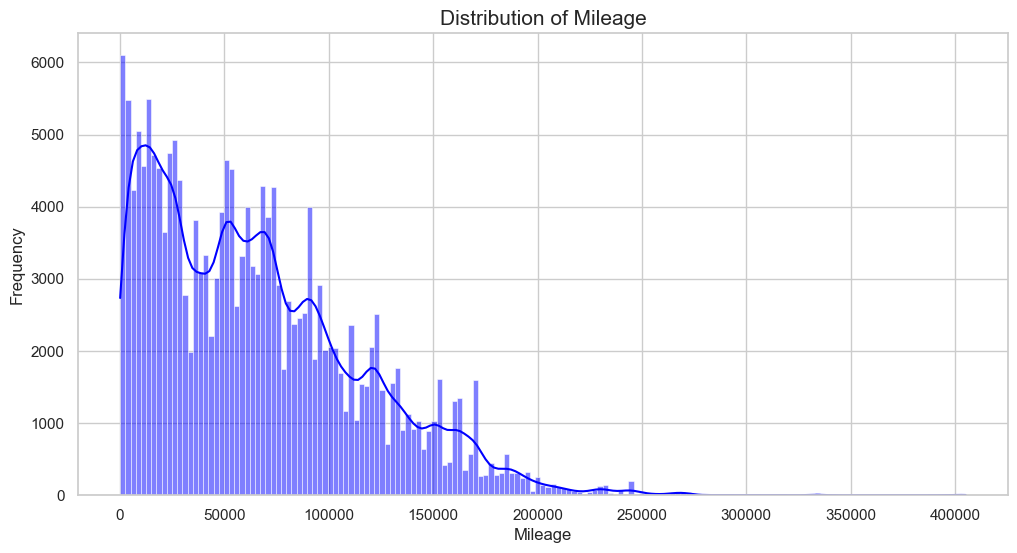

In [ ]:
# check the mileage col of both the train and test data

train_df['milage'].value_counts()

test_df['milage'].value_counts()

# Check the distribution of the 'milage' column in the train dataset
plt.figure(figsize=(12, 6))
sns.histplot(train_df['milage'], kde=True, color='blue')
plt.title('Distribution of Mileage', fontsize=15)
plt.xlabel('Mileage', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

In [ ]:
train_df['model_year'].unique()

array([2007, 2002, 2017, 2021, 2018, 2016, 2020, 2015, 2011, 2013, 2023,
       2019, 2012, 2014, 2008, 2009, 2022, 2003, 2005, 2001, 2006, 2000,
       2010, 2004, 1997, 1998, 1999, 1994, 1993, 1996, 1995, 2024, 1974,
       1992], dtype=int64)

In [ ]:
test_df['model_year'].unique()

array([2015, 2020, 2022, 2016, 2018, 2013, 2008, 2019, 2017, 2002, 2023,
       2014, 2021, 2012, 2004, 2009, 2011, 2010, 2001, 2007, 2005, 2000,
       2003, 2006, 1999, 2024, 1997, 1993, 1994, 1998, 1995, 1996, 1992,
       1974, 1982, 1988], dtype=int64)

In [ ]:
cat_cols = ['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']
for i in cat_cols:
    train_df[i] = train_df[i].astype('category')
    test_df[i] = test_df[i].astype('category')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb

In [ ]:
X = train_df.drop(columns=['price'], axis=1)
Y = train_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188533 entries, 0 to 188532
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   brand         188533 non-null  category
 1   model         188533 non-null  category
 2   model_year    188533 non-null  int64   
 3   milage        188533 non-null  int64   
 4   fuel_type     183450 non-null  category
 5   engine        188533 non-null  category
 6   transmission  188533 non-null  category
 7   ext_col       188533 non-null  category
 8   int_col       188533 non-null  category
 9   accident      186081 non-null  category
 10  clean_title   167114 non-null  category
dtypes: category(9), int64(2)
memory usage: 6.8 MB


In [ ]:
Y.info()

<class 'pandas.core.series.Series'>
Index: 188533 entries, 0 to 188532
Series name: price
Non-Null Count   Dtype
--------------   -----
188533 non-null  int64
dtypes: int64(1)
memory usage: 2.9 MB


In [ ]:
# Initialize a list to store model scores
model_scores = []

# Define a function to evaluate and log the model's performance
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    model_scores.append((model_name, rmse))
    print(f"{model_name} RMSE: {rmse:.4f}")
    return rmse

In [ ]:
lgbparams3 = {'subsample': 0.7,
              'reg_lambda': 0.0,
              'reg_alpha': 1.0,
              'num_leaves': 100,
              'n_estimators': 500,
              'min_data_in_leaf': 100,
              'min_child_weight': 0.1,
              'max_depth': 10,
              'learning_rate': 0.01,
              'colsample_bytree': 0.7,
              'bagging_freq': 5,
              'bagging_fraction': 0.5}


In [ ]:

model = lgb.LGBMRegressor(**lgbparams3, log_period=150, stopping_rounds=200)
model.fit(X_train, y_train)


[LightGBM] [Warning] Unknown parameter: log_period
[LightGBM] [Warning] Unknown parameter: stopping_rounds
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=0.7 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Warning] Unknown parameter: log_period
[LightGBM] [Warning] Unknown parameter: stopping_rounds
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=0.7 will be ignored. C

LGBMRegressor(bagging_fraction=0.5, bagging_freq=5, colsample_bytree=0.7,
              learning_rate=0.01, log_period=150, max_depth=10,
              min_child_weight=0.1, min_data_in_leaf=100, n_estimators=500,
              num_leaves=100, reg_alpha=1.0, stopping_rounds=200,
              subsample=0.7)

In [ ]:

y_pred = model.predict(X_test)
rmse3 = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)



[LightGBM] [Warning] Unknown parameter: log_period
[LightGBM] [Warning] Unknown parameter: stopping_rounds
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=0.7 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


In [ ]:
print("R2 Score:", r2)
print('LGB3 RMSE : ', rmse3)

R2 Score: 0.16634067633199057
LGB3 RMSE :  68088.85920137


In [ ]:
preds = model.predict(test_df)

[LightGBM] [Warning] Unknown parameter: log_period
[LightGBM] [Warning] Unknown parameter: stopping_rounds
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=0.7 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


In [ ]:
Sub = pd.DataFrame({
    'id': submission_df.index,
    'price': preds
})

Sub.to_csv('LGB_submission_2.csv', index=False)